In [86]:
import matplotlib
print(matplotlib.__path__)

['D:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib']


In [116]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [117]:
import networkx as nx

In [118]:
import re

In [119]:
strText = """
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [120]:
city = re.findall(r"name:'(\w+)',\sgeoCoord:\[(\d+.\d+),\s(\d+.\d+)\]",strText)
city[0][2]

'22.19'

In [121]:
cityLocation = {}

In [122]:
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    city = re.findall(r"name:'(\w+)',\sgeoCoord:\[(\d+.\d+),\s(\d+.\d+)\]",line)
    x=float(city[0][1])
    y=float(city[0][2])
    cityLocation[city[0][0]]=(x,y)
cityLocation

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [123]:
import math
def getDistance(origin,destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [124]:
def getCityDistance(city1,city2):
    return getDistance(cityLocation[city1],cityLocation[city2])

In [125]:
getCityDistance("杭州","上海")

153.5185697155768

In [126]:
cities = list(cityLocation.keys())

In [127]:
cityGraph = nx.Graph()

In [128]:
cityGraph.add_nodes_from(cities)

In [129]:
import matplotlib.pyplot as plt

In [130]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [131]:
import matplotlib.pyplot as plt

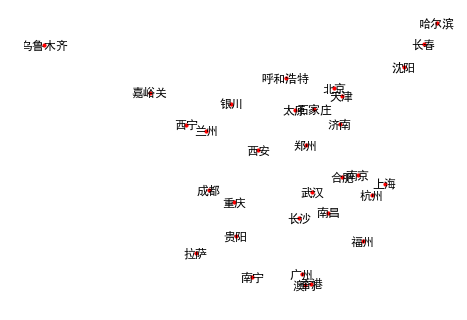

In [132]:
nx.draw(cityGraph,cityLocation,with_labels=True,node_size=10)

In [133]:
threshold = 300

In [134]:
from collections import defaultdict

In [135]:
citiesConnection = defaultdict(list)

In [136]:
for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
        if getCityDistance(c1,c2) < threshold:
            citiesConnection[c1].append(c2)
            citiesConnection[c2].append(c1)
            

In [137]:
len(citiesConnection)

29

In [138]:
citiesConnectionGraph = nx.Graph(citiesConnection)

In [139]:
citiesConnection

defaultdict(list,
            {'上海': ['杭州', '杭州'],
             '兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '南京': ['合肥', '杭州', '合肥', '杭州'],
             '南宁': ['贵阳', '贵阳'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '合肥': ['济南', '南京', '济南', '南京', '南昌', '南昌'],
             '呼和浩特': ['太原', '太原'],
             '哈尔滨': ['长春', '长春'],
             '天津': ['济南', '北京', '济南', '北京'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '广州': ['长沙', '香港', '澳门', '长沙', '香港', '澳门'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '杭州': ['南京', '南京', '福州', '上海', '福州', '上海'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '沈阳': ['长春', '长春'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '澳门': ['广州', '长沙', '香港', '广州', '长沙', '香港'],
             '石家庄': ['郑州', '济南

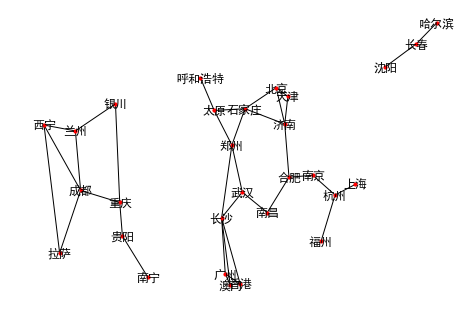

In [140]:
nx.draw(citiesConnectionGraph,cityLocation,with_labels=True,node_size=10)

In [141]:
def isGoal(desitination):
    def _wrap(currentPath):
        return currentPath[-1] == desitination
    return _wrap

In [142]:
def search(graph,start,isGoal,searchStrategy):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop()
        froniter = path[-1]
        if froniter in seen: continue
        successors = graph[froniter]
        for city in successors:
            if city in path: continue
            newPath = path+[city]
            pathes.append(newPath)
            if isGoal(newPath): return newPath
        seen.add(froniter)
        pathes = searchStrategy(pathes)

In [143]:
def transferStationsFirst(pathes):
    return sorted(pathes,key=len)

In [144]:
def transferAsMuchAsPossible(pathes):
    return sorted(pathes,key=len,reverse=True)

In [145]:
path = search(citiesConnection,start='北京',isGoal=isGoal('上海'),searchStrategy = lambda n: n)
print(path)

['北京', '天津', '济南', '合肥', '南京', '杭州', '上海']


In [146]:
def sortPath(cmpFunc,beam=-1):
    def _sorted(pathes):
        return sorted(pathes,key=cmpFunc)[:beam]
    return _sorted

In [147]:
path  = search(citiesConnection,start='北京',isGoal=isGoal('拉萨'),searchStrategy = lambda n: n)
print(path)

None


In [148]:
def prettyPrint(cities):
    print('->'.join(cities))

In [149]:
prettyPrint(search(citiesConnection,'北京',isGoal('福州'),transferStationsFirst))

北京->天津->济南->合肥->南京->杭州->福州


## 网络爬虫

In [154]:
import requests

In [155]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [156]:
response = requests.get(url)

In [157]:
whatWeWant = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class=""'

In [158]:
pattern = re.compile(whatWeWant)

In [159]:
likes = pattern.findall(response.text)
likes

['movie.douban.com/subject/24753477/?from=subject-page',
 'movie.douban.com/subject/26100958/?from=subject-page',
 'movie.douban.com/subject/25820460/?from=subject-page',
 'movie.douban.com/subject/1432146/?from=subject-page',
 'movie.douban.com/subject/1866473/?from=subject-page',
 'movie.douban.com/subject/25937854/?from=subject-page',
 'movie.douban.com/subject/25821634/?from=subject-page',
 'movie.douban.com/subject/26213252/?from=subject-page',
 'movie.douban.com/subject/3168101/?from=subject-page',
 'movie.douban.com/subject/4920389/?from=subject-page']

## Machine Learning

In [160]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [161]:
data = load_boston()

In [162]:
x,y = data['data'],data['target']

In [163]:
xRm = x[:,5]

In [165]:
def drawRmAndPrice(x=xRm,yin=y):
    plt.scatter(x,yin)

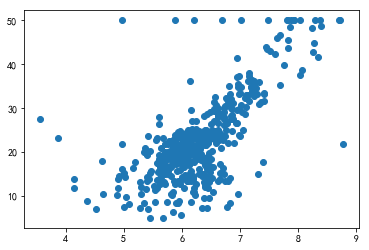

In [166]:
drawRmAndPrice()

In [167]:
def price(rm, k, b):
    return k * rm + b

In [168]:
import random

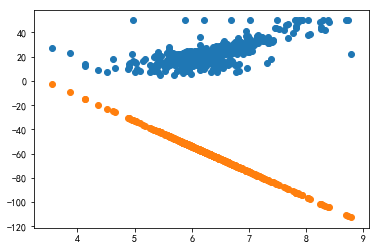

In [169]:
xRm = x[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
priceByRandom = [price(r,k,b) for r in xRm]
drawRmAndPrice()
plt.scatter(xRm,priceByRandom)

In [170]:
def loss(y,yHat):
    return sum((yi-yHati)**2 for yi,yHati in zip(list(y),list(yHat)))/len(y)

In [171]:
xRm = x[:,5]

### First Method Random Generation

In [172]:
tryingTimes = 2000
minLoss = float('inf')
for i in range(tryingTimes):
    currK = random.random() * 200 - 100
    currB = random.random() * 200 - 100
    priceByKAndB = [price(r, currK, currB) for r in xRm]
    currLoss = loss(y,priceByKAndB)
    if currLoss < minLoss:
        minLoss = currLoss 
        bestK,bestB = currK, currB
        print('When time is: {}, get bestK: {}, bestB: {}, and the loss is: {}'.format(i,currK,currB,minLoss))

When time is: 0, get bestK: -51.83997555683493, bestB: -47.6969713645242, and the loss is: 158709.29650663535
When time is: 2, get bestK: 17.84565526547577, bestB: -93.96905229531576, and the loss is: 100.17583409790394
When time is: 253, get bestK: 0.46928534891850404, bestB: 20.48510335336198, and the loss is: 81.13183345843584
When time is: 529, get bestK: 9.049377711457325, bestB: -40.375589789062325, and the loss is: 80.03963338511295
When time is: 872, get bestK: 6.144249345069497, bestB: -11.45543637266367, and the loss is: 69.31207746621492
When time is: 1011, get bestK: 7.118010063379174, bestB: -24.601701606409293, and the loss is: 51.302121996503764
When time is: 1976, get bestK: 12.490861210795345, bestB: -57.15969960900371, and the loss is: 50.679375023286816


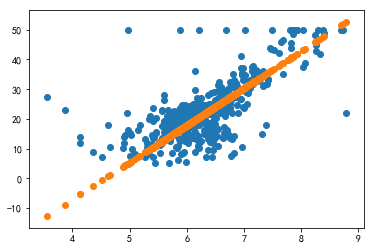

In [173]:
xRm = x[:,5]
k = bestK
b = bestB
priceByRandom = [price(r,k,b) for r in xRm]
drawRmAndPrice()
plt.scatter(xRm,priceByRandom)

### Second Method Direction Adjusting

In [174]:
tryingTimes = 2000
minLoss = float('inf')
bestK = random.random() * 200 - 100
bestB = random.random() * 200 - 100
direction = [(1,1),(1,-1),(-1,1),(-1,-1)]
nextDirection = random.choice(direction)
scalar = 0.1
for i in range(tryingTimes):
    kDirec,bDirec = nextDirection
    currK,currB = bestK + kDirec*scalar, bestB + bDirec * scalar
    priceByKAndB = [price(r, currK, currB) for r in xRm]
    currLoss = loss(y,priceByKAndB)
    if currLoss < minLoss:
        minLoss = currLoss
        bestK,bestB = currK,currB
        nextDirection = nextDirection
        print('When time is: {}, get bestK: {}, bestB: {}, and the loss is: {}'.format(i,bestK,bestB,minLoss))
    else:
        nextDirection = random.choice(direction)


When time is: 0, get bestK: -38.20828556770436, bestB: 94.70318233844466, and the loss is: 29355.17827405193
When time is: 1, get bestK: -38.10828556770436, bestB: 94.60318233844467, and the loss is: 29173.284685952403
When time is: 2, get bestK: -38.008285567704355, bestB: 94.50318233844467, and the loss is: 28991.959498969358
When time is: 3, get bestK: -37.908285567704354, bestB: 94.40318233844468, and the loss is: 28811.20271310282
When time is: 4, get bestK: -37.80828556770435, bestB: 94.30318233844469, and the loss is: 28631.014328352736
When time is: 5, get bestK: -37.70828556770435, bestB: 94.20318233844469, and the loss is: 28451.394344719134
When time is: 6, get bestK: -37.60828556770435, bestB: 94.1031823384447, and the loss is: 28272.342762202014
When time is: 7, get bestK: -37.50828556770435, bestB: 94.0031823384447, and the loss is: 28093.859580801363
When time is: 8, get bestK: -37.40828556770435, bestB: 93.90318233844471, and the loss is: 27915.944800517194
When time is

When time is: 342, get bestK: -6.108285567704078, bestB: 62.20318233844638, and the loss is: 159.232209040787


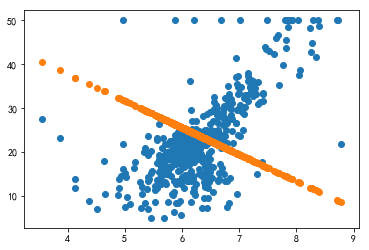

In [175]:
xRm = x[:,5]
k = bestK
b = bestB
priceByRandom = [price(r,k,b) for r in xRm]
drawRmAndPrice()
plt.scatter(xRm,priceByRandom)

In [176]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Supervised Learn

In [177]:
from icecream import ic

## 导数

In [178]:
def partial_b_w(x, y, y_hat):
    n = len(y)
    dw = 0
    db = 0
    diff = 0
    for xi, yi, yhat in zip(list(x), list(y), list(y_hat)):
        diff = yi - yhat
        db += diff
        dw += diff * xi
    db = -2 / n * db
    dw = -2 / n * dw
    return db, dw
    

In [179]:
def price(x, w, b):
    return w * x + b

In [180]:
xRm, y = data['data'][:,5], data['target']
#plt.scatter(xRm,y)

#### loss计算公式：$$loss = \frac{1}{n}\sum_{i=0}^{n}{(y_i - \hat y_i)^2}$$

#### $$loss = \frac{1}{n}\sum_{i=0}^{n}(y_i-(wx_i+b))^2 $$

#### $$\frac{\partial loss}{\partial w} = - \frac{2}{n}sum_{i=0}^{n}(y_i - (kx_i + b_i))x_i$$

#### $$\frac{\partial loss}{\partial b} = - \frac{2}{n}sum_{i=0}^{n}(y_i - (kx_i + b_i))$$

In [181]:
trying_times = 2000
min_loss = float('inf')
curr_w = random.random() * 2 - 1
curr_b = random.random() * 2 - 1
learning_rate = 1e-4
update_time = 0
for i in range(trying_times):
    price_predict = [price(x, curr_w, curr_b) for x in xRm]
    #print(price_predict)
    curr_loss = loss(y, price_predict)
    if curr_loss < min_loss:
        min_loss = curr_loss
        if i % 50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, curr_w, curr_b, min_loss))
    db, dw = partial_b_w(xRm, y, price_predict)
    curr_b = curr_b + (-1 * db) * learning_rate
    curr_w = curr_w + (-1 * dw) * learning_rate
    

When time is : 0, get best_k: 0.13620392529550518 best_b: -0.16080835169585606, and the loss is: 560.088835228187
When time is : 50, get best_k: 1.3024357565791826 best_b: 0.018210661581419665, and the loss is: 278.9013987080055
When time is : 100, get best_k: 2.0754989668917214 best_b: 0.13542209361443877, and the loss is: 155.41694757884883
When time is : 150, get best_k: 2.588016730913804 best_b: 0.21167497975858665, and the loss is: 101.18717282306369
When time is : 200, get best_k: 2.9278759216857404 best_b: 0.26078558195233525, and the loss is: 77.37033052424786
When time is : 250, get best_k: 3.153317510075141 best_b: 0.29190967601716594, and the loss is: 66.90921419389602
When time is : 300, get best_k: 3.3029366874951993 best_b: 0.3111146216463774, and the loss is: 62.313215433469786
When time is : 350, get best_k: 3.4023097583600452 best_b: 0.32242114349533746, and the loss is: 60.292861595781126
When time is : 400, get best_k: 3.4683856565542843 best_b: 0.32849369983411286, 

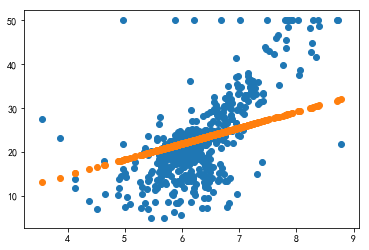

In [182]:
k = curr_w
b = curr_b
priceByRandom = [price(r,k,b) for r in xRm]
drawRmAndPrice(xRm, y)
plt.scatter(xRm,priceByRandom)

#### 绝对值计算loss：$$loss = \frac{1}{n}\sum_{i=0}^{n}{|y_i - \hat{y_i}|}$$

$$loss=\frac{1}{n}\sum_{i=0}^{n} \begin{cases}
y_i-(wx_i+b),&y_i > \hat y_i \\ 0,&y_i = \hat y_i \\
-y_i+(wx_i+b)),&y_i < \hat y_i\end{cases}$$

权重偏导：
$$\frac{\partial loss}{\partial w}=\frac{1}{n}\sum_{i=0}^{n} \begin{cases}
-x_i,&y_i > \hat y_i \\ 0,&y_i = \hat y_i \\
x_i,&y_i < \hat y_i\end{cases}$$

偏置偏导：
$$\frac{\partial loss}{\partial b}=\frac{1}{n}\sum_{i=0}^{n} \begin{cases}
-1,&y_i >= \hat y_i \\ 0,&y_i = \hat y_i \\
1,&y_i < \hat y_i\end{cases}$$

In [183]:
def delta_w_b(x, y, y_hat):
    n = len(y)
    dw = 0
    db = 0
    diff = 0
    for xi, yi, yhat in zip(list(x), list(y), list(y_hat)):
        if yi > yhat:
            dw += -1*xi
            db += -1
        elif yi == yhat:pass
        else:
            dw += xi
            db += 1
    db = 1 / n * db
    dw = 1 / n * dw
    return db, dw
    

In [184]:
def price(x, w, b):
    return w * x + b

In [185]:
xRm, y = data['data'][:,5], data['target']
#plt.scatter(xRm,y)

In [186]:
trying_times = 2000
min_loss = float('inf')
curr_w = random.random() * 2 - 1
curr_b = random.random() * 2 - 1
learning_rate = 1e-4
update_time = 0
for i in range(trying_times):
    price_predict = [price(x, curr_w, curr_b) for x in xRm]
    #print(price_predict)
    curr_loss = loss(y, price_predict)
    if curr_loss < min_loss:
        min_loss = curr_loss
        if i % 50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, curr_w, curr_b, min_loss))
    db, dw = delta_w_b(xRm, y, price_predict)
    curr_b = curr_b + (-1 * db) * learning_rate
    curr_w = curr_w + (-1 * dw) * learning_rate
    

When time is : 0, get best_k: -0.24743352618533598 best_b: -0.5387256923185104, and the loss is: 693.1365040171584
When time is : 50, get best_k: -0.21601035424857684 best_b: -0.533725692318511, and the loss is: 682.9155625888028
When time is : 100, get best_k: -0.1845871823118177 best_b: -0.5287256923185115, and the loss is: 672.7775930000329
When time is : 150, get best_k: -0.15316401037505856 best_b: -0.5237256923185121, and the loss is: 662.7225952508472
When time is : 200, get best_k: -0.12174083843829941 best_b: -0.5187256923185126, and the loss is: 652.7505693412475
When time is : 250, get best_k: -0.09031766650154027 best_b: -0.5137256923185132, and the loss is: 642.8615152712339
When time is : 300, get best_k: -0.05889449456478117 best_b: -0.5087256923185137, and the loss is: 633.0554330408042
When time is : 350, get best_k: -0.027471322628022352 best_b: -0.5037256923185143, and the loss is: 623.3323226499625
When time is : 400, get best_k: 0.003951849308736602 best_b: -0.4987

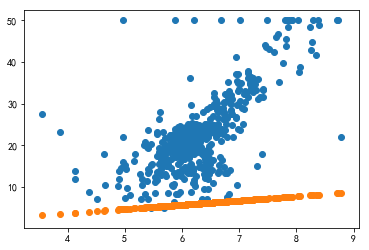

In [187]:
k = curr_w
b = curr_b
priceByRandom = [price(r,k,b) for r in xRm]
drawRmAndPrice(xRm, y)
plt.scatter(xRm,priceByRandom)